# Introduction

The aim of this notebook is to centralise all of my ML learning.

I will use this notebook as reference for my future projects.

As my development will be on-going, so will this notebook - by proxy.

## Contents

#### ** I want to have a table of contents for easy future reference ** - but can't implement it. 


The required libraries for each topic can be found on the beginning of each topic's section. 

In [422]:
## General libraries

# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Basic Libraries for: Cleaning & Manipulation
import math
import numpy as np
import pandas as pd

# Data Viz
import matplotlib.pyplot as plt
from word2number import w2n

# SciKit Libraries - General ML
from sklearn import metrics

# ----------------------------------------------------------------------------------------------------------------

## Linear Regression

###### What is linear regression?

The modelling of a relationship between a response variable and one or more explanatory valuable. 

*Using the explanatory variable(s) to predict a respone variable*

*e.g. I have 9 years of experience (explanatory 1), and I scored a 10 in the interview (explanatory 2) - what is the amount of money that I'll earn? (response)*

###### Formula:
y = mx + b

- m : Coefficient 
- b : Y-intercept


### 1.1 Linear Regression: Single Variable

This example will look at data (unofficial) from 1970 and the mean per capita income (USD).

Our model will take in a year and predict a mean income for that given year.

In [378]:
# Required libraries for Linear Regression
import statsmodels.api as sm # OLS
from sklearn.linear_model import LinearRegression

In [379]:
# This is the dataset that we'll use for the single vairable linear regression
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


##### Manipulation - Year & Income Per Capita

In [380]:
# Renaming the column names to be more accessible
df = df.rename(columns={"per capita income (US$)" : "per_capita_income"})
df.columns

Index(['year', 'per_capita_income'], dtype='object')

#### OLS Linear Regression

In [381]:
#Respons variable
y = df['per_capita_income']

#Explanatory variable
x = df['year']

x = sm.add_constant(x)

# Fit model
model = sm.OLS(y, x)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      per_capita_income   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     367.5
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           2.80e-23
Time:                        21:47:21   Log-Likelihood:                -455.71
No. Observations:                  47   AIC:                             915.4
Df Residuals:                      45   BIC:                             919.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.632e+06   8.61e+04    -18.951      0.0

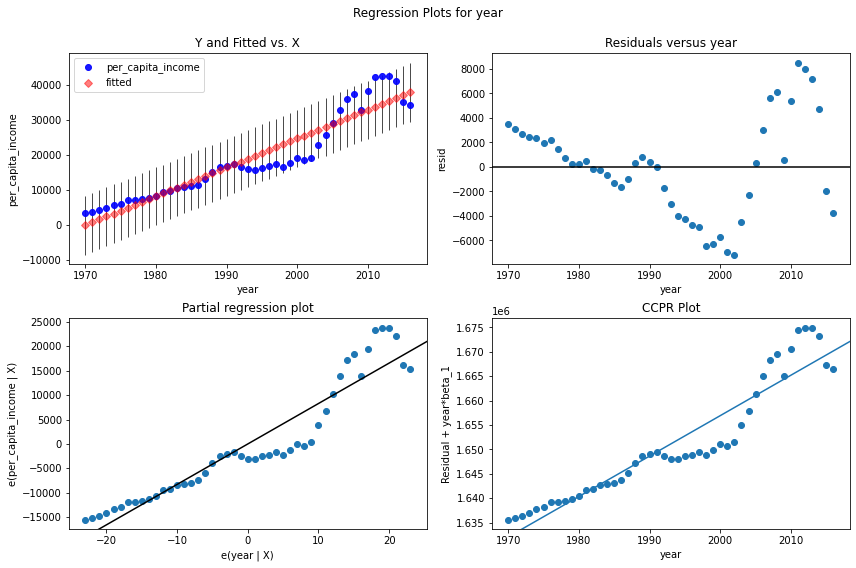

In [382]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Droduce residual plots
fig = sm.graphics.plot_regress_exog(model, 'year', fig=fig)

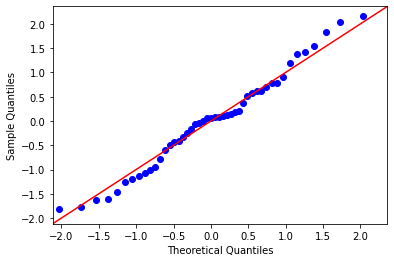

In [383]:
#define residuals
res = model.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

#### Using Sci-Kit 

In [399]:
# Using Sklearn
reg = LinearRegression() # Just a variable to store the model - I change it later in the notebook 
reg.fit(df[['year']],df[['per_capita_income']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [401]:
# Predict income for ny year
# Can do print(reg.predict([[x]]))
reg.predict([[2034]])

array([[52887.20514754]])

### 1.2 Linear Regression: Multiple Variable 

This example looks at data containing: Experience (years), test score (/10), interview score (/10) and salary ($) 

Our model will take in an experience year, test score and interview score to predict a salary.

In [339]:
# This is the dataset that we'll use for the multi vairable linear regression
df2 = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv")
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


##### Manipulation - Experience, Test Score, Interview Score & Salary

In [340]:
# Filling in the null values - to use the values in the LR, we need to convert the words to numbers
df2.experience = df2.experience.fillna("zero")
df2.experience = df2.experience.apply(w2n.word_to_num)

In [341]:
# Since the "Test Score (Out of 10)" are floats, we need to find the mean to find the interger mean.
mean_test_score = math.floor(df2['test_score(out of 10)'].mean())
df2['test_score(out of 10)'] = df2['test_score(out of 10)'].fillna(mean_test_score)
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


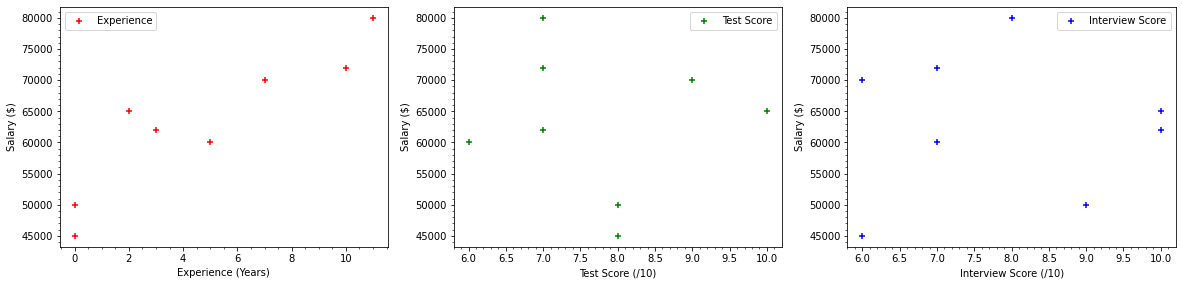

In [342]:
# Let's see what our data looks like
%matplotlib inline

# Set graph size
plt.figure(figsize=(20,15))

#Plotting data - Experience 
plt.subplot(331)

plt.scatter(df2['experience'], df2['salary($)'], color='red', marker = '+', label = 'Experience') # , s = x : set marker size
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.minorticks_on()
plt.legend()

# Plotting data - Test Score
plt.subplot(332)

plt.scatter(df2['test_score(out of 10)'], df2['salary($)'], color='green', marker = '+', label = 'Test Score')
plt.xlabel('Test Score (/10)')
plt.ylabel('Salary ($)')
plt.minorticks_on()
plt.legend()

# Plotting data - Interview Score
plt.subplot(333)

plt.scatter(df2['interview_score(out of 10)'], df2['salary($)'], color='blue', marker = '+', label = 'Interview Score')
plt.xlabel('Interview Score (/10)')
plt.ylabel('Salary ($)')
plt.minorticks_on()
plt.legend()

##### Multi Variable Linear Regression

In [343]:
# Creating the model
reg2 = LinearRegression()

# Use this format for multiple variables - reg.fit(df[['col1', 'col2', 'col3']], df['response variable'])
# Since the response variable column in this example will have invalid syntax - we need to put it in it's own s.brackets.
## "($)" - flags an error
reg2.fit(df2[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']],df2['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [344]:
# Use - modelname.predict([[1,2,3]]) - to use the model to predict
    # The explanatory values should be in the order of how the model was fitted
reg2.predict([[3, 8, 9]])

array([60857.27438577])

In [345]:
# Multi variable prediction
    # modelname.predict([[x,x..], [x,x...]]) 
        # As long as the brackets open like ([[]]), then you can include as many variables as you want
        
reg2.predict([[4,7,9], [1,9,9], [6, 8, 9]])

array([61558.23430121, 57234.04545532, 69624.08143084])

# ----------------------------------------------------------------------------------------------------------------

## 2. Saving A Model

Here we'll look at how we go about saving a model.

It makes sure our model is safely stored, and so that we can easily share our model.

In [374]:
# Required library for saving a model
import joblib

In [346]:
# joblib.dump(model_variable_name, "model_save_name")
joblib.dump(reg2, '(01) practice_model_regression_multi')

['(01) practice_model_regression_multi']

In [347]:
# new_model_variable = joblib.load("model_save_name")
prac = joblib.load('(01) practice_model_regression_multi')

In [348]:
prac.predict([[1,9,8]])

array([55086.56288895])

# ----------------------------------------------------------------------------------------------------------------

## 3. Gradient Descent & Cost Function

We can use this method to find the best coefficient (m) and y-intercept (b); this will allow us to get the best score for our model - with the lowest cost function.

We can substitute these values in the formula:
    
    - y = (m * x) + b

Formulas:

- **mse or cf = (1/n) * sum([val ** 2 for val in (y - y_predicted])])** - Mean Squared Error / Cost Function
- **mse or cf = (1/n) * sum((y - y_predicted)**2)** - Mean Sqaured Error / Cost Function


- **partial derivative of *m* = -(2/n) * sum(x*(y - y_predicted))** - Partial Derivative (m) 
- **partial derivative of *b* = -(2/n) * sum(y - y_predicted)** - Partial Derivative (b)


- **m = m - learning_rate * m_pderivative** - Position of m (y = **m** * x + b), learning_rate and m_pderivative are variables - make sure to name them 
- **b = b - learning_rate * b_pderivative** - Position of b (y = m * x + **b**), learning_rate and m_pderivative are variables - make sure to name them 

##### Script for GD & CF - Order Is Important

This GD uses the first dataset, from the single variable linear regression

In [349]:
def gradient_descent(x,y): # Create a function to make gradient descent with x&y 
    m_gd = b_gd = 0 # future reference for; m*x = b // gd = gradient descent 
    iterations = 50 # This is a variable and can be changed - Random value to find global minima - how many steps are taken
    n = len(x) # This will be used for finding the derivative
    learning_rate = 0.001 #This is a variable for the learning rate - steps taken in the gradient descent
    
    for i in range(iterations): # For loop for how many steps are taken and takes into account the following:
                                # Cost - if it's reducing, 
        y_predicted = m_gd * x + b_gd # y = m*x +b
        cost = (1/n) * sum([val ** 2 for val in (y - y_predicted)]) # Finds cost - if you're reducing the cost the GD is working
        m_d = -(2/n) * sum(x*(y - y_predicted)) # Caculating patrial derivative of m - Partial derivative because for GD the "steps" are smaller
        b_d = -(2/n) * sum(y-y_predicted) # Calculating partial derivative of b - Partial derivative because for GD the "steps" are smaller
        m_gd = m_gd - learning_rate * m_d 
        b_gd = b_gd - learning_rate * m_d
        print("m {}, b {}, cost {}, interations {}".format(m_gd,b_gd, cost, i)) # Print each value increment at each iteration,
                                                                         # Format it route to from the interations and m/b values
                                                                         # "i" is important as it counts each increment of the iterations - otherwise you'd get a constant xx... number

# Assign X and Y values - array makes it easier to multiply in the future.
x = np.array(df['year'])
y = np.array(df['per_capita_income'])

gradient_descent(x,y)

m 75720.54148241132, b 75720.54148241132, cost 499723531.6384421, interations 0
m -601709648.3039906, b -601709648.3039906, cost 2.279232062602457e+16, interations 1
m 4782058623553.389, b 4782058623553.389, cost 1.4396083930024966e+24, interations 2
m -3.800518137180091e+16, b -3.800518137180091e+16, cost 9.092853566237402e+31, interations 3
m 3.02044354703682e+20, b 3.02044354703682e+20, cost 5.743227559585894e+39, interations 4
m -2.400483010878487e+24, b -2.400483010878487e+24, cost 3.6275370059473965e+47, interations 5
m 1.9077723505772253e+28, b 1.9077723505772253e+28, cost 2.2912246803723414e+55, interations 6
m -1.516192918313967e+32, b -1.516192918313967e+32, cost 1.4471831789283914e+63, interations 7
m 1.2049870441040175e+36, b 1.2049870441040175e+36, cost 9.140697424021027e+70, interations 8
m -9.576576693638563e+39, b -9.576576693638563e+39, cost 5.7734466938299645e+78, interations 9
m 7.610938359701117e+43, b 7.610938359701117e+43, cost 3.6466240134916314e+86, interations 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


# ----------------------------------------------------------------------------------------------------------------

## 4. Training & Testing Model

This allows us to, as is stated in the topic name; train our model and then test our model.

Using this method also allows us to get a better understanding of the relationship between our variables (model score) 

How? We are able to split our data into 4 groups:
    - x_train = the explanatory set to predict the response variables
    - y_train = the response set - the set that we aim to predict in the testing phase
    
    - x_test  = the explanatory set that we use to test our fitted, trained model. 
    - y_test  = the reponse set that we use to test our fitted, trained model. 

80% of the data is used for training the model, 20% of the data is used to test the model. 
##### To get the best score with this method you'd have to iterate the training/testing datasets manually to get the best training set
##### An alternative to this would be 1) Gradient Descent (Previous) or, 2) K fold cross-validation (Further Down)
------------------



The dataset used for training/testing is the 2nd dataset, from the multi variable dataset.

In [373]:
# Required library for splitting data into training and testing. 
from sklearn.model_selection import train_test_split # Allows us to split our data into training and testing sets

In [350]:
# Splitting the dataset 
x_df2 = df2[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y_df2 = df2[['salary($)']]

# If using a single column for "x" - do:
    ## x = x.values.reshape(-1,1) # Reshapes the data to make it usable

In [357]:
# Syntax to split data into train & test data
x_train, x_test, y_train, y_test = train_test_split(x_df2,y_df2,test_size=0.3) #Can add ,random_state = 10) to keep samples the same

In [421]:
# Doing LR with the split data
## e_t_i = experience, test score, interview score 
e_t_i = LinearRegression() # This is just a classifier to fit the model later on (just a variable to store model)

In [359]:
# Fit the model with train data
e_t_i.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [402]:
# Check the score of the model - how accurate the model is
e_t_i.score(x_test,y_test) # This model is 96.9% accurate

0.9693592982612209

In [403]:
# Test our trained model using the test data 
e_t_i.predict(x_test)

array([[48153.43759221],
       [78197.69843612],
       [62611.97993508]])

In [404]:
# Since we know it's a high scoring model, we can input any variables we want
e_t_i.predict([[1, 8, 10]])

array([[56403.06875184]])

# ----------------------------------------------------------------------------------------------------------------

## Logistic Regression

###### What is logistic regression?

A classification model used to predict the catergorical.
Whether something happens or not. 

Binary - predicts a reponse variable based on one explanatory variable.
    - e.g. if a person will buy a new smartphone based on age; If I'm x years old, am I likely to buy a new phone?
    
Multiclass - predicts a response variable based on multiple explanatory varibles. 
    - e.g. Fraud: When a purchase happens, purchase amount, type of purchase etc. If it breaks usual trends, is it likely to be fraud?

##### Formula:
Sigmoid(x) = 1 / 1 + e^(-x)   | e = Euler's number = ~2.71828
        - Get your linear regression formula (m*x + b) and replace x in the Sigmoid formula
            - Sigmoid = 1 / 1 + e^(mx+b)
    

### 5.1 Logistic Regression - Binary

This example will look at a range of people of different ages and if they buy life insurance.

Our model should take in a given age and print a chance of us buying life insurance.

In [371]:
# Import Logistic Regressions
from sklearn.linear_model import LogisticRegression

In [362]:
# This is the dataset that we'll use for the single vairable logistic regression
df3 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')
df3_cols = list(df3.columns)

print(f"The columns in this dataset are: {df3_cols}")
print(f"The shape of this dataset is: {df3.shape[0]} rows and {df3.shape[1]} columns.")

The columns in this dataset are: ['age', 'bought_insurance']
The shape of this dataset is: 27 rows and 2 columns.


In [363]:
df3.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


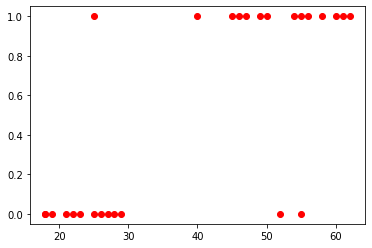

In [364]:
# Visualising how our data looks
plt.scatter(df3['age'], df3['bought_insurance'], color='red')

In [411]:
##Split Data
log_xtrain, log_xtest, log_ytrain, log_ytest = train_test_split(df3[['age']], df3.bought_insurance, test_size = 0.2)
log_xtrain = log_xtrain.sort_values(by="age")

In [412]:
## Assign model to a variable
log_bi = LogisticRegression() 

In [413]:
# Fitting Model
log_bi.fit(log_xtrain, log_ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [414]:
log_bi.predict(log_xtest) 

array([0, 0, 1, 1, 1, 0], dtype=int64)

In [415]:
# Testing model accuracy
log_bi.score(log_xtest, log_ytest) # Model is 100% accurate

1.0

In [416]:
log_bi.predict_proba(log_xtest)

array([[0.52306029, 0.47693971],
       [0.50133138, 0.49866862],
       [0.35851925, 0.64148075],
       [0.36858167, 0.63141833],
       [0.36353553, 0.63646447],
       [0.53930435, 0.46069565]])

In [420]:
# Predicting probablity if someone gets insurance by age. 0 = Won't Get, 1 = Will Get
# Remember to use; ([[x]]) - when predicting with random int. 
print(log_bi.predict([[16]]))
print(log_bi.predict([[56]]))

[0]
[1]


Our model is 100% accurate, above we can see that; 
- If the individual is 16 - they won't get the life insurance.
- If the individual is 56 - they will get the life insurance.

## 5.2 Logistic Regression - Multiclass